In [1]:
# Install libs needed
!pip3 install torch 
!pip3 install torchvision
!pip3 install torchtext
!pip3 install pandas
!pip3 install nltk
!pip3 install -U scikit-learn scipy matplotlib
!pip3 install spacy
!pip3 install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import libs
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import re
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import string
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from torch.utils.data import TensorDataset, DataLoader

In [3]:
# Download wordnet for lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Download the stopwords from nltk
nltk.download('stopwords')
ntst = stopwords.words('english')
print(ntst)
print(len(ntst))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Import stopwords from spacy
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)
print(len(STOP_WORDS))

{'meanwhile', 'have', 'to', 're', 'yourself', 'much', 'this', 'others', 'which', 'wherever', 'another', 'me', 'next', '’re', 'do', 'somehow', 'us', 'nine', 'herein', 'not', 'of', 'full', 'still', 'due', 'front', 'upon', 'across', 'you', 'the', 'ten', 'seeming', 'down', 'using', 'from', 'therein', 'yours', '’ll', 'onto', 'eight', 'both', 'anything', 'quite', 'them', 'is', 'whoever', 'say', 'once', 'on', 'so', 'anywhere', 'keep', 'with', 'something', 'became', 'yourselves', 'side', 'nowhere', 'nothing', 'hereafter', 'thru', "'ve", "n't", 'put', 'mine', 'well', 'three', 'anyway', 'thereby', 'never', 'elsewhere', 'take', 'most', 'becoming', 'who', 'whether', 'has', 'we', 'every', '‘d', 'just', 'ours', 'though', 'someone', 'ever', 'out', 'third', '‘ll', 'each', 'else', 'may', 'below', 'been', 'myself', 'our', 'will', 'an', 'forty', 'they', 'ourselves', 'his', 'since', 'doing', 'sometimes', 'made', 'cannot', 'was', 'such', 'does', 'all', 'how', 'among', 'often', 'throughout', 'somewhere', 'r

In [6]:
# Merge stopwords from two libs
stwords = set(ntst).union(STOP_WORDS)
print(stwords)
print(len(stwords))

{'meanwhile', 'have', 'to', 're', "wouldn't", 'yourself', 'much', 'go', 'this', 'six', "don't", 'others', 'through', 'which', 'further', 'wherever', 'aren', 'another', 'me', 'having', 'next', '’re', 'do', 'somehow', 'nor', 'us', 'nine', 'herein', 'least', 'there', "you're", 'not', 'formerly', 'of', 'full', 'still', 'mostly', 'due', 'front', 'becomes', "haven't", 'upon', 'across', 'everything', 'won', 'seemed', 'hundred', 'you', 'the', "should've", 'last', 'only', 'ten', "you'll", 'seeming', "shan't", 'down', 'using', 'from', 'anyone', 'it', 'therein', 'ca', 'be', 'yours', '’ll', 'whatever', 'onto', "'s", 's', "didn't", 'eight', 'as', 'both', 'nobody', 'along', "it's", 'for', 'anything', 'quite', "'m", '’m', 'them', 'is', 'whoever', 'say', 'once', 'on', 'so', 'theirs', 'anywhere', 'none', 'keep', 'amongst', 'with', 'something', 'eleven', 'she', 'didn', 'amount', 'became', 'per', 'beforehand', 'yourselves', 'side', 'itself', 'mightn', 'besides', 'n‘t', 'otherwise', 'hasn', 'nowhere', 'wh

In [7]:
##### Preprocessing the data when reading the data from csv file #####
# Delete the stopwords
def delete_stopwords(text):
  text = str(text)
  tx_arr = text.split()
  [w for w in tx_arr if w not in stwords]
  return ' '.join( [w for w in tx_arr if w not in stwords])

def clean_str(string):
    string = str(string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

# Replace the empty text with np.NaN so that we can apply 'dropna' to the all the rows
def replace_empltytext(text):
  text = str(text)
  if text.isspace() or len(text) <= 0:
    text = np.NaN
  return text

# Load the csv file and do all the preprocessing mentioned above
def load_csv(file_path):
  df = pd.read_csv(file_path)
  df.columns = ["id","title","text","label"]
  df.drop(labels=['id','title'], axis='columns', inplace=True)
  df['text'] = df['text'].apply(clean_str)
  df['text'] = df['text'].apply(delete_stopwords)  
  df['text'] = df['text'].apply(replace_empltytext)
  df.dropna(inplace=True)
  return df

In [8]:
# Only if you are using Google Colab, you need to mount the Google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [9]:
# Make a finder named NLP and change the root path to this finder
import os
os.chdir("/content/gdrive/My Drive/NLP/")

In [10]:
# Use the function defined above to load the csv data
df = load_csv('WELFake_Dataset.csv')

In [11]:
# Print the data summary 
df.info()

# Print some rows of the dataset
print(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71388 entries, 0 to 72133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    71388 non-null  object
 1   label   71388 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB
                                                    text  label
0      comment expected barack obama members fyf911 f...      1
1                                  post votes hillary \?      1
2      , demonstrators gathered night exercising cons...      1
3      dozen politically active pastors came private ...      0
4      rs 28 sarmat missile , dubbed satan 2 , replac...      1
...                                                  ...    ...
72129  washington \( reuters \) hackers believed work...      0
72130  know , fantasyland republicans questioned citi...      1
72131  migrants refuse leave train refugee camp hunga...      0
72132  mexico city \( reuters \) donald trump combati...  

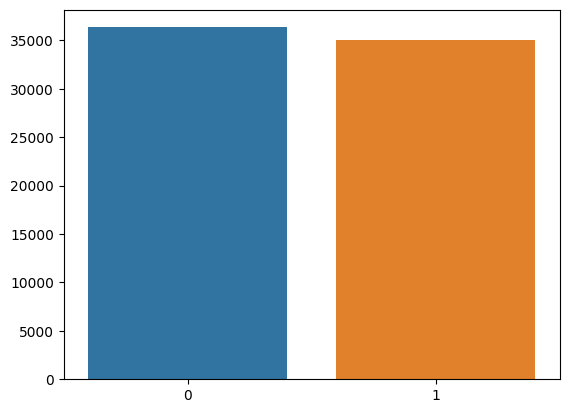

In [12]:
# Check if the data is balanced between all the classes
data_count = df['label'].value_counts()
sns.barplot(x=np.array([0,1]),y=data_count.values)
plt.show()

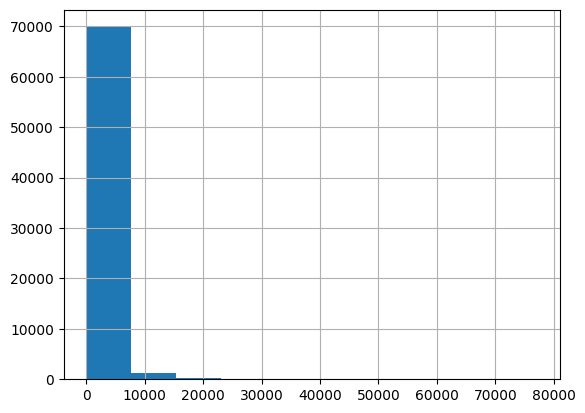

count    71388.000000
mean      2212.280944
std       2415.306556
min          1.000000
25%        952.000000
50%       1649.000000
75%       2764.000000
max      77126.000000
dtype: float64

In [13]:
# Plot the length distribution of sentences of the dataset
rev_len = [len(i) for i in  df['text']]
pd.Series(rev_len).hist()
plt.show()

# Summarize the sentence length distribution
pd.Series(rev_len).describe()

In [14]:
# Calculate the number of rows with lable 1 and 0
df_zero = df[df['label']==0]
df_one = df[df['label']==1]

print('length of sentences with label zero : %4d' % (len(df_zero)))
print('length of sentences with label one: %4d' % (len(df_one)))

length of sentences with label zero : 35026
length of sentences with label one: 36362


In [15]:
# Calculate 80% of the number of class 0 and class 1
# Then take the smaller one 
train_length = int(min(len(df_zero) * 0.7, len(df_one) * 0.7))
print('length of each train set: %4d ' % (train_length))

# Randomly pick the number calculated above of rows from class 1 and class 0
# This operation makes sure we take the same number of rows from each class
# Make sure our training dataset is balanced
zero_train, zero_test = train_test_split(df_zero, train_size=train_length, shuffle=True, random_state=36)
one_train, one_test = train_test_split(df_one,  train_size=train_length, shuffle=True, random_state=36)

# Concate the rows selected above from each label to form the final training set
train, test = pd.concat([zero_train, one_train]), pd.concat([zero_test, one_test])
print('length of final train set: {}'.format(len(train)))
print('length of final test set: {}'.format(len(test)))

length of each train set: 24518 
length of final train set: 49036
length of final test set: 22352


In [16]:
def tockenize(x_train, y_train, x_val, y_val):
    word_list = []
    for sent in x_train:
      for word in sent.split():
        word_list.append(word)

    corpus = Counter(word_list)
    print(len(corpus))
    # sorting on the basis of most common words
    corpus_sorted = sorted(corpus, key=corpus.get, reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_sorted)}
    # tockenize
    final_list_train, final_list_test = [],[]

    for sent in x_train:
            final_list_train.append([onehot_dict[word] for word in sent.split() 
                                     if word in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[word] for word in sent.split() 
                                    if word in onehot_dict.keys()])

    return final_list_train, y_train, final_list_test, y_val, onehot_dict

In [17]:
# Use the method definve above to do the tokenization for training and test dataset
x_train, y_train, x_test, y_test, vocab = tockenize(train['text'], train['label'], test['text'], test['label'])

183922


In [18]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


In [21]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [22]:
x_train_pad = padding_(x_train,700)
x_test_pad = padding_(x_test,700)

In [23]:
print(x_train_pad)
print(len(x_train_pad))

print(x_test_pad)
print(len(x_test_pad))

[[  0   0   0 ... 868 590 103]
 [  0   0   0 ... 365 181  47]
 [  0   0   0 ...  43 938 671]
 ...
 [  0   0   0 ...   3 336 203]
 [  0   0   0 ... 227   1 241]
 [  0   0   0 ... 476   1 152]]
49036
[[  0   0   0 ...   2  10  99]
 [  0   0   0 ...   3  63 776]
 [  0   0   0 ... 629  13  13]
 ...
 [  0   0   0 ... 275   1  55]
 [  0   0   0 ... 822   1  55]
 [  0   0   0 ... 987 603 399]]
22352


In [24]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(np.array(x_train_pad)), torch.from_numpy(np.array(y_train)))
valid_data = TensorDataset(torch.from_numpy(np.array(x_test_pad)), torch.from_numpy(np.array(y_test)))

# dataloaders 
batch_size = 100

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size=batch_size)

In [25]:
# is_cuda = not torch.cuda.is_available
is_cuda = torch.cuda.is_available
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available, CPU used")

GPU is available


In [33]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True)
        self.attention = nn.Linear(hidden_size, 1)
        self.fc = nn.Linear(hidden_size, num_classes)

        self.hidden = 
        
    def forward(self, x):
        embedded = self.embedding(x)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(embedded, (h0, c0))
        # Extract the last timestep's output
        out = out[:, -1, :]
        out = self.fc(out)
        return out

    def reset_hidden(self):
      self.hidden = 


In [34]:
# Define the model
embedding_dim = 80
num_classes = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
hidden_size = 64
num_layers = 12
num_classes = 2

# Create the model
model = LSTMClassifier(vocab_size, embedding_dim, hidden_size, num_layers, num_classes)
model.to(device)

LSTMClassifier(
  (embedding): Embedding(1001, 80)
  (lstm): LSTM(80, 64, num_layers=12, batch_first=True)
  (attention): Linear(in_features=64, out_features=1, bias=True)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)

In [35]:
# Count the number of parameters
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

Total parameters: 483731


In [38]:
import torch.optim as optim

# Given labels and predictions accordingly, compute the number of the right prediction
def num_of_acc(pred,label):
    _, predicted = torch.max(pred, dim=1)
    return torch.sum(predicted == label.squeeze()).item()

# Given an model and dataloader, compute the accuracy
def acc_of(model,dataloader):
    model.eval()
    num_sample = 0
    accnum = 0
    for X, y in dataloader:
      num_sample += len(X)
      X, y = X.to(device), y.to(device)
      # print(X.shape, y.shape)
      outputs = model(X)
      batch_acc = num_of_acc(outputs,y)
      accnum += batch_acc
    return (accnum / num_sample)

criterion = nn.CrossEntropyLoss()  # Assuming your classification task has multiple classes
# criterion = nn.MultiMarginLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.00003)  # Adjust the learning rate as needed
num_epochs = 50  # Define the number of training epochs
optimizer = optim.NAdam(model.parameters(), lr=0.001) 

for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    train_acc = 0.0
    num_sample = 0
    for i ,(X, y) in enumerate(train_loader):
        num_sample += len(X)
        X, y = X.to(device), y.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Perform forward pass
        outputs = model(X)
        # print(outputs.shape, y.shape)
        batch_acc = num_of_acc(outputs,y)
        train_acc += batch_acc
        loss = criterion(outputs, y)
        # Perform backward pass
        loss.backward()
        optimizer.step()
    # Print the loss for monitoring the training progress
    val_acc = acc_of(model, valid_loader)
    print('Epoch: %5d, Loss: %.5f, train_acc: %.5f, val_acc: %.5f' % (epoch + 1, loss.item(), train_acc / num_sample, val_acc))

Epoch:     1, Loss: 0.27354, train_acc: 0.83881, val_acc: 0.83062
Epoch:     2, Loss: 0.18372, train_acc: 0.89292, val_acc: 0.90350
Epoch:     3, Loss: 0.15548, train_acc: 0.91908, val_acc: 0.94148
Epoch:     4, Loss: 0.23149, train_acc: 0.94435, val_acc: 0.94707
Epoch:     5, Loss: 0.16425, train_acc: 0.95153, val_acc: 0.95343
Epoch:     6, Loss: 0.04825, train_acc: 0.95913, val_acc: 0.95504
Epoch:     7, Loss: 0.03487, train_acc: 0.96392, val_acc: 0.95692
Epoch:     8, Loss: 0.11816, train_acc: 0.96933, val_acc: 0.93804
Epoch:     9, Loss: 0.05910, train_acc: 0.97002, val_acc: 0.96407
Epoch:    10, Loss: 0.08978, train_acc: 0.97626, val_acc: 0.96273
Epoch:    11, Loss: 0.01886, train_acc: 0.97914, val_acc: 0.96376
Epoch:    12, Loss: 0.00556, train_acc: 0.98324, val_acc: 0.96582
Epoch:    13, Loss: 0.02414, train_acc: 0.98746, val_acc: 0.96381
Epoch:    14, Loss: 0.02248, train_acc: 0.98732, val_acc: 0.96466
Epoch:    15, Loss: 0.03058, train_acc: 0.99060, val_acc: 0.96452
Epoch:    

AUC ROC : 0.968182 
----------------------------------------------------------


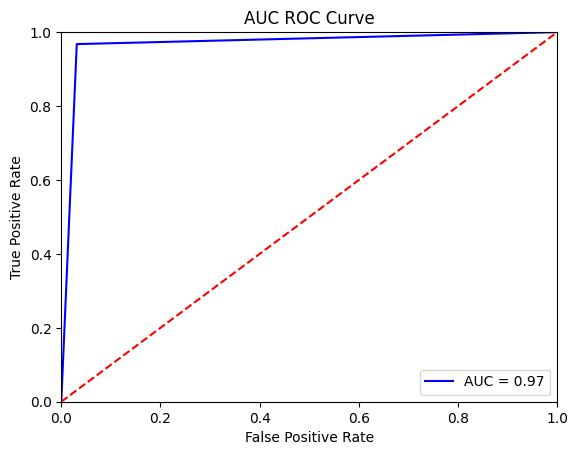

In [40]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
def plot_auc_roc(model,valid_loader, version='title', threshold=0.5):
    y_pred = []
    y_true = []
    model.eval()
    with torch.no_grad():
      for inputs, labels in valid_loader :
            inputs = inputs.to(device)
            output = model(inputs)

            output = (output > threshold).int()
            _, output = torch.max(output, dim = 1)
            # print(output)
            y_pred.extend(output.tolist())
            y_true.extend(labels.tolist())
    
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    print('AUC ROC : %f ' % (roc_auc))
    print('----------------------------------------------------------')
    
    plt.title('AUC ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
  
plot_auc_roc(model, valid_loader) 